In [27]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
data = pd.read_csv("email.csv")
df=data.copy()
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Category[object],"1. ham2. spam3. {""mode"":""full""","4,825 (86.6%)747 (13.4%)1 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmklEQVR4nO3bsW3bUBiF0f8JghM3JAQBGiHZQUNk2AzBIbKDIIhF7LhhCpeBu8crUzlngIdXfJJAgbcty1KQsLv3Bfh/tKp6rqqne1+ET+dtWZaXngfuj8fjj2EYDj0PZfvmeb621n72DG4/DMPhfD6/jOP42utQtu12u32dpulwuVyeqqpfbFVV4zi+nk6n370O5SE89z7QAwIxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YvZV7+8v3fsifB5r9bCf5/k6TdOhVnh/ie2a5/laVW89z7RB4CPdNwjNlI+Utb7Zun8q2L5V1lVrLHPYvu7rqrWWOWzfWusqT7b8w5+6xIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2Ijpvq6y1OIjq6yr1ljmsH02CMRYVxHjAYEYsRGza619b615gmR1u6r6VlVf7n0RHp+fUWLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsRGzq6pfVfXn3hfh8VlXEeNnlJi/50VzOmmjFDEAAAAASUVORK5CYII="">",0(0.0%)
2,Message[object],"1. Sorry, I'll call later2. I cant pick the phone right no3. Ok...4. Ok5. Ok.6. Your opinion about me? 1. Over7. 7 wonders in My WORLD 7th You 8. Say this slowly.? GOD,I LOVE Y9. Please call our customer servi10. Okie11. other","30 (0.5%)12 (0.2%)10 (0.2%)4 (0.1%)4 (0.1%)4 (0.1%)4 (0.1%)4 (0.1%)4 (0.1%)4 (0.1%)5,493 (98.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADiklEQVR4nO3csW0jZxRG0TcCIa+SIQgCKsHuQUVssVsEi9geBEETWGsl48AbuAD7DsA9J1L4Bxd4JMBPy77vA4WHox/Ar0NsZMRGRmxkxEZGbGTERkZsZMRGZpmZp5mZfd8/Dn4Ld+50vV6/zswsy/JNcPyfHtZ1vazrepmZx6Mfw33zmY2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyJy2bXv7+ffnoS/h7tkgkFn8yywqPrOReViW5Y9lWb4c/RDu38PM/D4zvx39EO6fM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERuZhZr7PzF9HP4T7Z4NAxhklIzYyBi9kDF7IOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxRsmIjYzYyFhXkbGuIuOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxhklIzYyBi9kDF7IOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxRsmIjYzBCxmDFzLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxhklIzYy1lVkrKvIOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxRsmIjYzBCxmDFzLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMmIjIzYy1lVkrKvIOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSsq8hYV5FxRsmIjYzBCxmDFzLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMsvMPM3M49EP4a597vv+cbper1/Xdb0c/Rru17Ztb8uyfDut63p5eXn5OJ/PP45+FPfn/f39y+12u7y+vj6eZmbO5/OP5+fnP49+GHfracYXBEJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjKnmX9+BnL0Q7hP/27rtG3b2+12u8zPn4HAf23btreZ+fSzcAqf+75/WFeR8QWBjNjIiI2M2MiIjYzYyIiNjNjIiI3M3+0SeWt/ErLEAAAAAElFTkSuQmCC"">",0(0.0%)


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 

In [7]:
df['Category'] = encoder.fit_transform(df['Category'])

In [9]:
df.duplicated().sum()

415

In [10]:
df = df.drop_duplicates(keep = 'first')

In [12]:
df.drop(df[df['Category'] == 2].index, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5956\1056855797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['Category'] == 2].index, inplace=True)


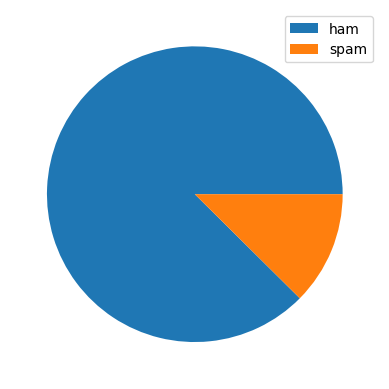

In [17]:
plt.pie([len(df[df['Category']==0]),len(df[df['Category']==1])])
plt.legend(['ham','spam'])

In [34]:
nltk.download('punkt_tab') 

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [35]:
df['no_characters'] = df['Message'].apply(len)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5956\1026851113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_characters'] = df['Message'].apply(len)


In [36]:
df

,Category,Message,no_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will ü b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [37]:
#no of words in a message
df['no_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x))) 

C:\Users\Asus\AppData\Local\Temp\ipykernel_5956\3827203715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [39]:
df

,Category,Message,no_characters,no_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35
5568,0,Will ü b going to esplanade fr home?,36,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [40]:
#sentence
df['no_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Asus\AppData\Local\Temp\ipykernel_5956\1364759024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [41]:
df

,Category,Message,no_characters,no_words,no_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [42]:
#we view the descriptive statistics
df.describe()

,Category,no_characters,no_words,no_sentences
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.560403,1.969750
std,0.329952,58.382922,13.405970,1.455526
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [43]:

#we now view the desriptive statistics of ham 
df[df['Category'] == 0][['no_characters', 'no_words', 'no_sentences']].describe()

,no_characters,no_words,no_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [45]:

#we now view the desriptive statistics of ham 
df[df['Category'] == 1][['no_characters', 'no_words', 'no_sentences']].describe()

,no_characters,no_words,no_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='no_characters', ylabel='Count'>

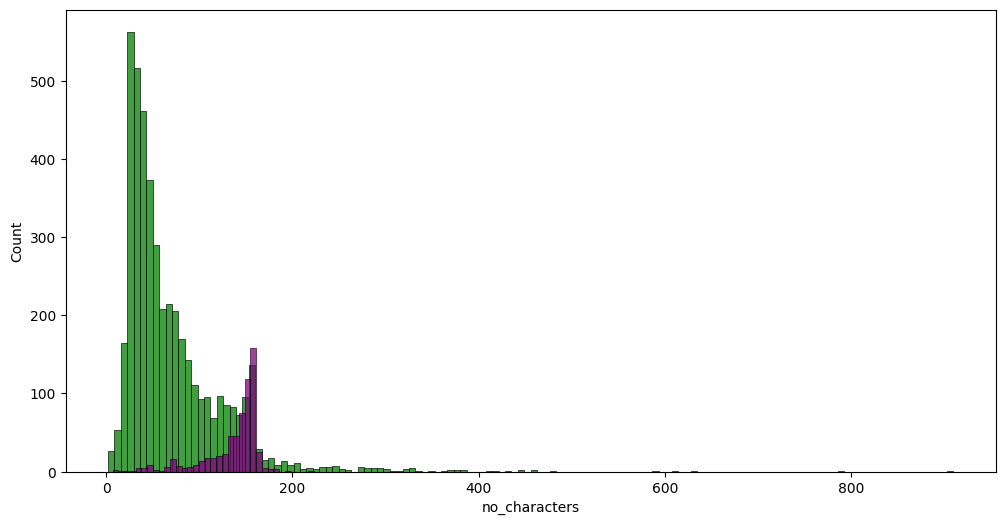

In [47]:
plt.figure(figsize= (12,6))
sns.histplot(df[df['Category'] == 0]['no_characters'],color = 'green')
sns.histplot(df[df['Category'] == 1]['no_characters'],color = 'purple')

<Axes: xlabel='no_words', ylabel='Count'>

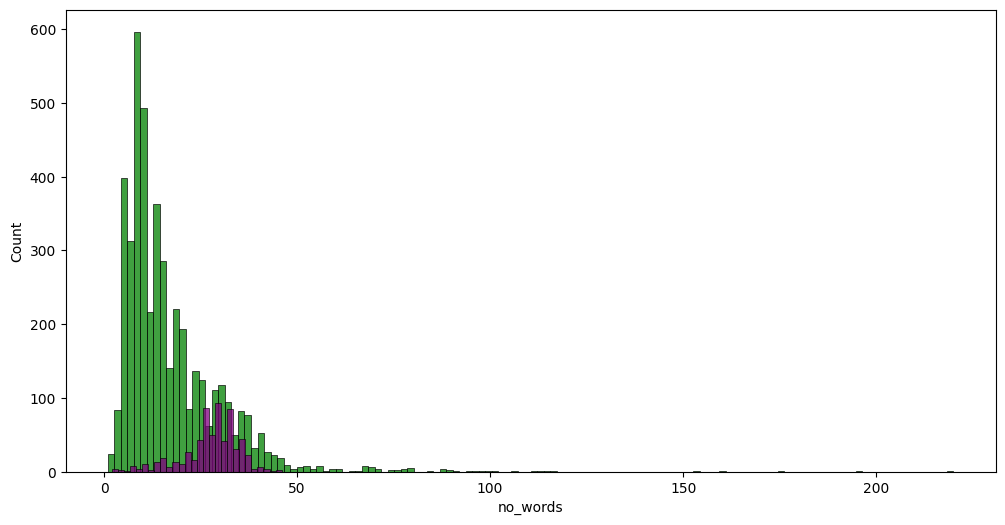

In [48]:
plt.figure(figsize= (12,6))
sns.histplot(df[df['Category'] == 0]['no_words'],color = 'green')
sns.histplot(df[df['Category'] == 1]['no_words'],color = 'purple')

<Axes: xlabel='no_sentences', ylabel='Count'>

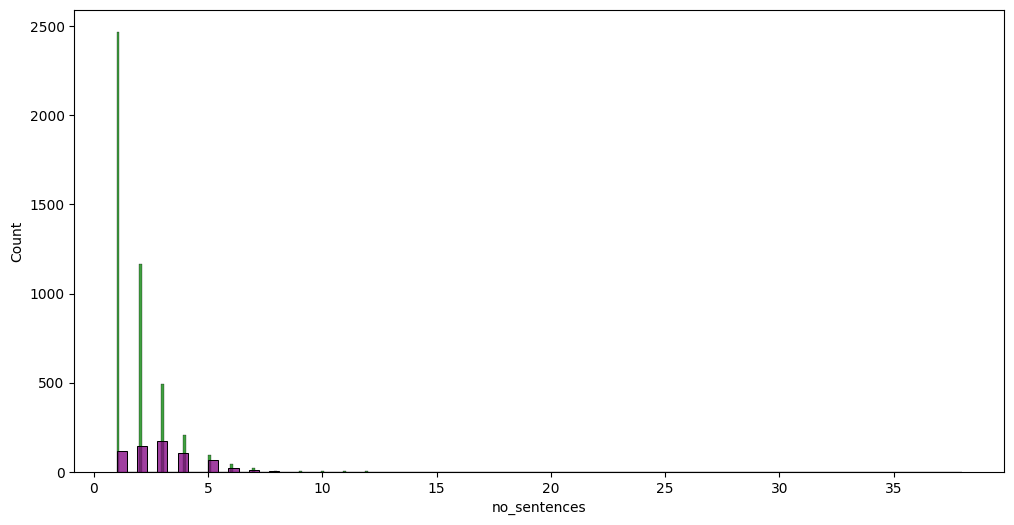

In [49]:
plt.figure(figsize= (12,6))
sns.histplot(df[df['Category'] == 0]['no_sentences'],color = 'green')
sns.histplot(df[df['Category'] == 1]['no_sentences'],color = 'purple')

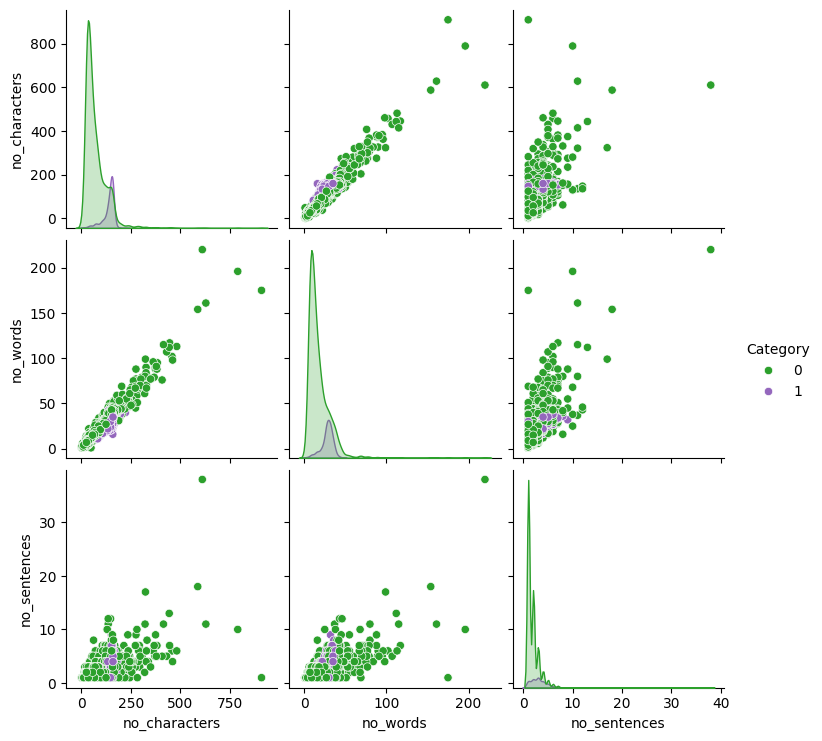

In [50]:
colors = ['#2ca02c', '#9467bd']  
sns.pairplot(df, hue='Category', palette=colors)

# Show the plot
plt.show()

<Axes: >

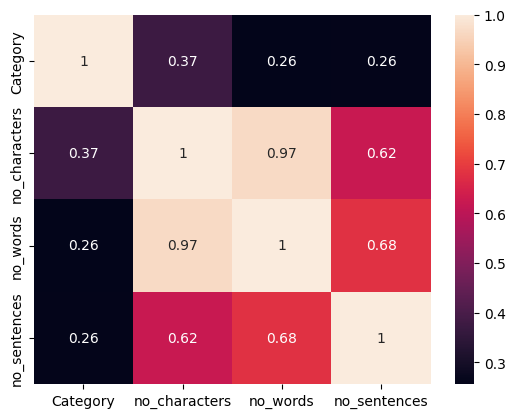

In [54]:
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot = True)

In [55]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [56]:
nltk.download('stopwords')  # You need to download the stopwords dataset

ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
def transform_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)  # It's 'word_tokenize', not 'word_tokenization'

    y = []
    for i in message:
        if i.isalnum():
            y.append(i)

    message = y[:]
    y.clear()

    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:  # Use 'stopwords.words('english')'
            y.append(i)

    message = y[:]
    y.clear()

    for i in message:
        y.append(ps.stem(i))

    return " ".join(y)


In [68]:
transform_message('Hello"""@@# meti joOn i am you are')

'hello meti joon'

In [72]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Sexi')

'sexi'

In [73]:
df['transformed_Message'] = df['Message'].apply(transform_message)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5956\3743416720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_Message'] = df['Message'].apply(transform_message)


In [74]:
df

,Category,Message,no_characters,no_words,no_sentences,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will ü b going to esplanade fr home?,36,9,1,ü b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [91]:
# to find out the total no of words we have in spam
spam_corpus = []
for msg in df[df['Category'] == 1]['transformed_Message']:
    for word in msg.split():
        spam_corpus.append(word)

In [98]:
len(spam_corpus)


9781

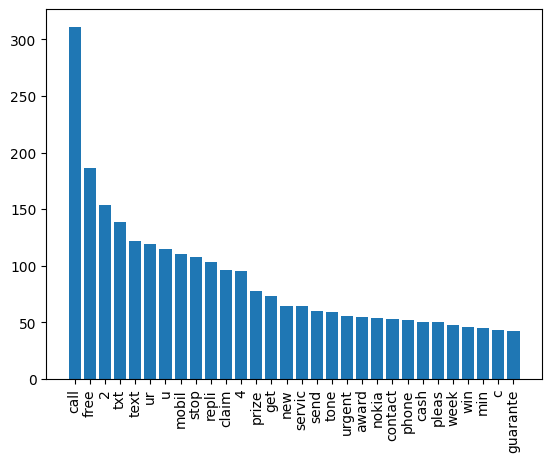

In [99]:
#we can represent words in a chart
from collections import Counter
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [100]:
ham_corpus = []
for msg in df[df['Category'] == 0]['transformed_Message']:
    for word in msg.split():
        ham_corpus.append(word)

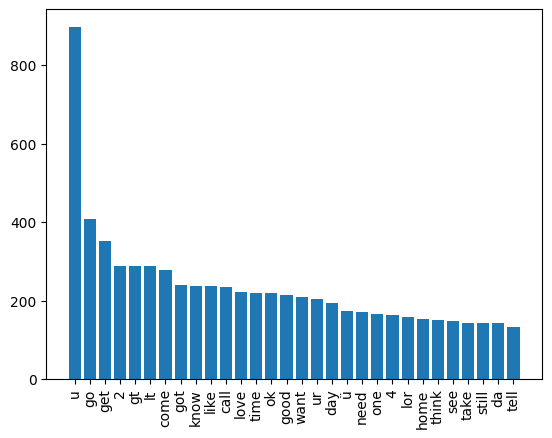

In [101]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
            pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [144]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=2000)

In [145]:
x = tfidf.fit_transform(df['transformed_Message']).toarray()

In [146]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [147]:
y = df['Category'].values.reshape(-1,1)

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 2)

In [149]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [150]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [151]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(gnb.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8674418604651163
0.8674418604651163
[[978 150]
 [ 21 141]]
0.4845360824742268


In [152]:
# note the array of zero false positive and good accuracy score 
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9736434108527132
[[1128    0]
 [  34  128]]
1.0


C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [153]:
#note the array size and false positive values in consideration
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9844961240310077
[[1125    3]
 [  17  145]]
0.9797297297297297


C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [155]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnd = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l2')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [156]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [157]:
# performance check
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [158]:
# checking through the performnace of all the models we have used and its very much amusing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# Create a Logistic Regression classifier with 'l2' penalty
# clf = LogisticRegression(penalty='l1')

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test )
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For  SVC
Accuracy -  0.975968992248062
Precision -  0.9924812030075187
For  KN
Accuracy -  0.9170542635658915
Precision -  1.0


C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For  NB
Accuracy -  0.9736434108527132
Precision -  1.0
For  DT
Accuracy -  0.9372093023255814
Precision -  0.813953488372093
For  LR
Accuracy -  0.9589147286821705
Precision -  0.9739130434782609


C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


For  RF
Accuracy -  0.9751937984496124
Precision -  1.0


C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9635658914728682
Precision -  0.9457364341085271


C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For  BgC
Accuracy -  0.9596899224806201
Precision -  0.8819444444444444


C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


For  ETC
Accuracy -  0.9775193798449613
Precision -  0.9925925925925926


C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For  GBDT
Accuracy -  0.9503875968992248
Precision -  0.9711538461538461
For  xgb
Accuracy -  0.9713178294573643
Precision -  0.9629629629629629


In [159]:
#create a dataframe to store and compare the accuracy and precision of the different algorithm
# Assuming clfs, accuracy_scores, and precision_scores are defined
performance_df = pd.DataFrame({'Algorithm': list(clfs.keys()), 'Accuracy': accuracy_scores, 'Precision': precision_scores})
performance_df = performance_df.sort_values('Precision', ascending=False)

In [160]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.917054,1.000000
2,NB,0.973643,1.000000
5,RF,0.975194,1.000000
8,ETC,0.977519,0.992593
0,SVC,0.975969,0.992481
4,LR,0.958915,0.973913
9,GBDT,0.950388,0.971154
10,xgb,0.971318,0.962963
6,AdaBoost,0.963566,0.945736
7,BgC,0.959690,0.881944


In [161]:
# now I vote classify and save the model
svc = SVC(kernel = 'sigmoid', gamma = 1.0, probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

from sklearn.ensemble import VotingClassifier


In [162]:
voting = VotingClassifier(estimators = [('svm', svc), ('nb', mnb), ('et', etc)], voting = 'soft')

In [163]:

voting.fit(X_train, y_train)

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [164]:

y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.982170542635659
Precision 1.0


In [165]:
from sklearn.ensemble import StackingClassifier

In [166]:

# also choose to test on the stacking classifier one last time for clarity.
#applying stacking
estimators = [('svm', svc), ('nb', etc)]
final_estimator = RandomForestClassifier()

In [168]:
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [169]:

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy 0.9751937984496124
Precision 0.9166666666666666
